# Breast Cancer Prediction

### Importing Required Modules

In [1]:
import pandas as pd
#import pylab as pl
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier

## Import Dataset

In [2]:
df = pd.read_csv("data.csv", na_values="?")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## Data Pre Processing

### Deal with Null Values

In [3]:
df.replace("?", np.NaN)
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.shape

(569, 33)

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df=df.drop(labels=["Unnamed: 32"],axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df['diagnosis']=en.fit_transform(df['diagnosis'])

In [10]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


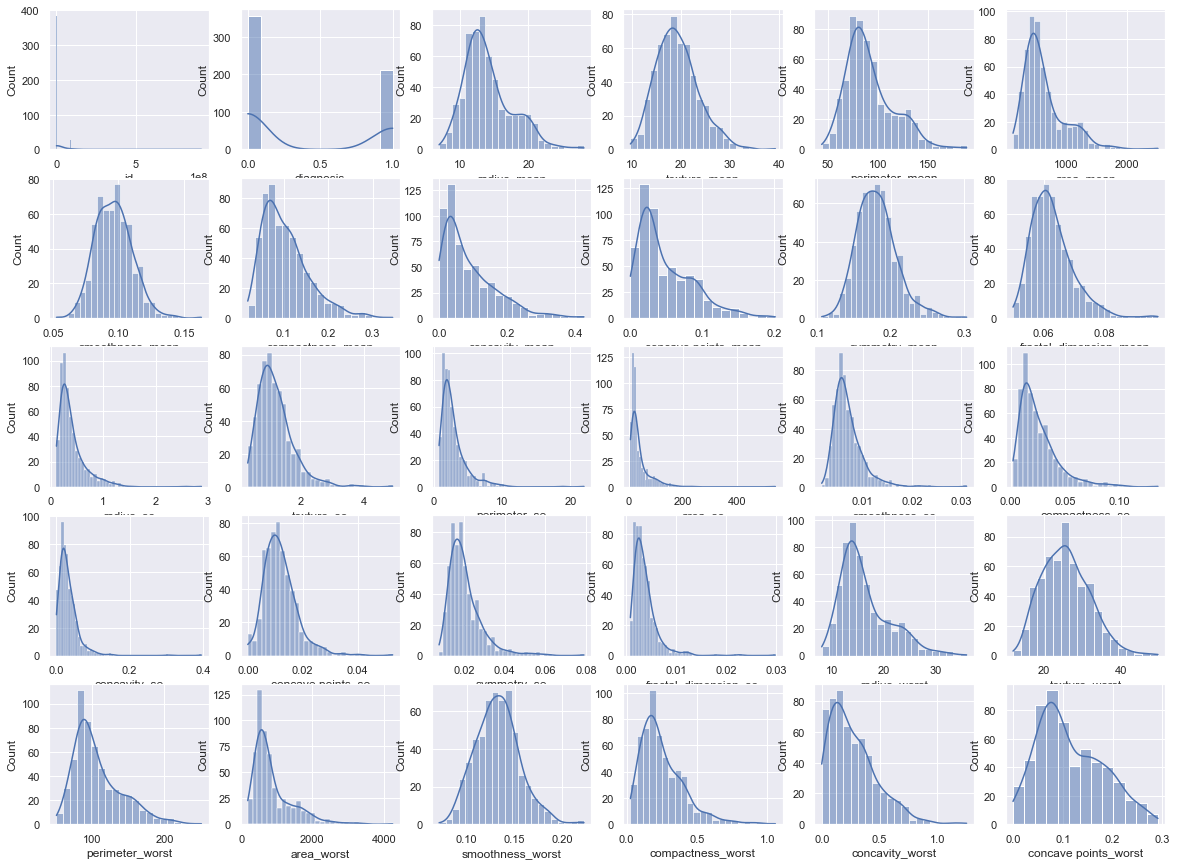

In [11]:
plt.figure(figsize = (20, 15))
sns.set(style="darkgrid")
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
plt.show()

## Checking for outliers

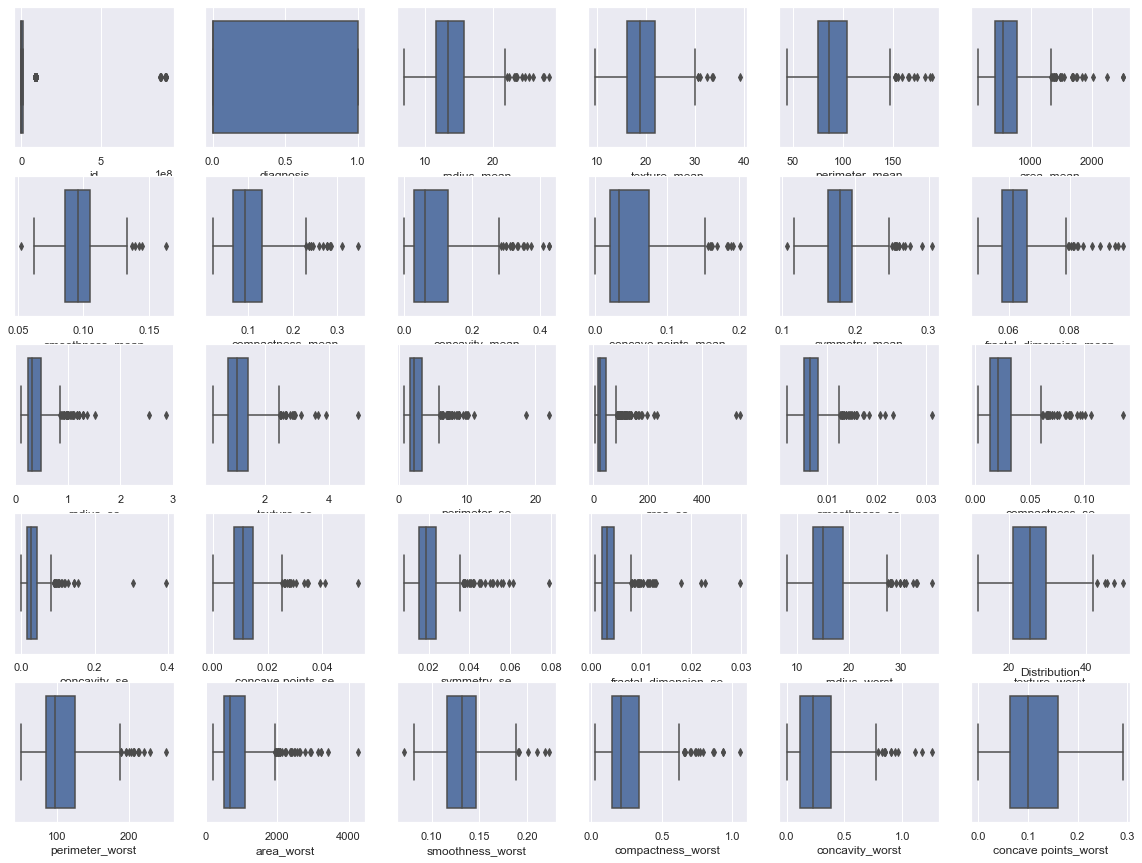

In [12]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.boxplot(x=df[column])
        plt.xlabel(column)
       
    plotnumber += 1
plt.title("Distribution")
plt.show()

## Check The Correlation

<AxesSubplot:>

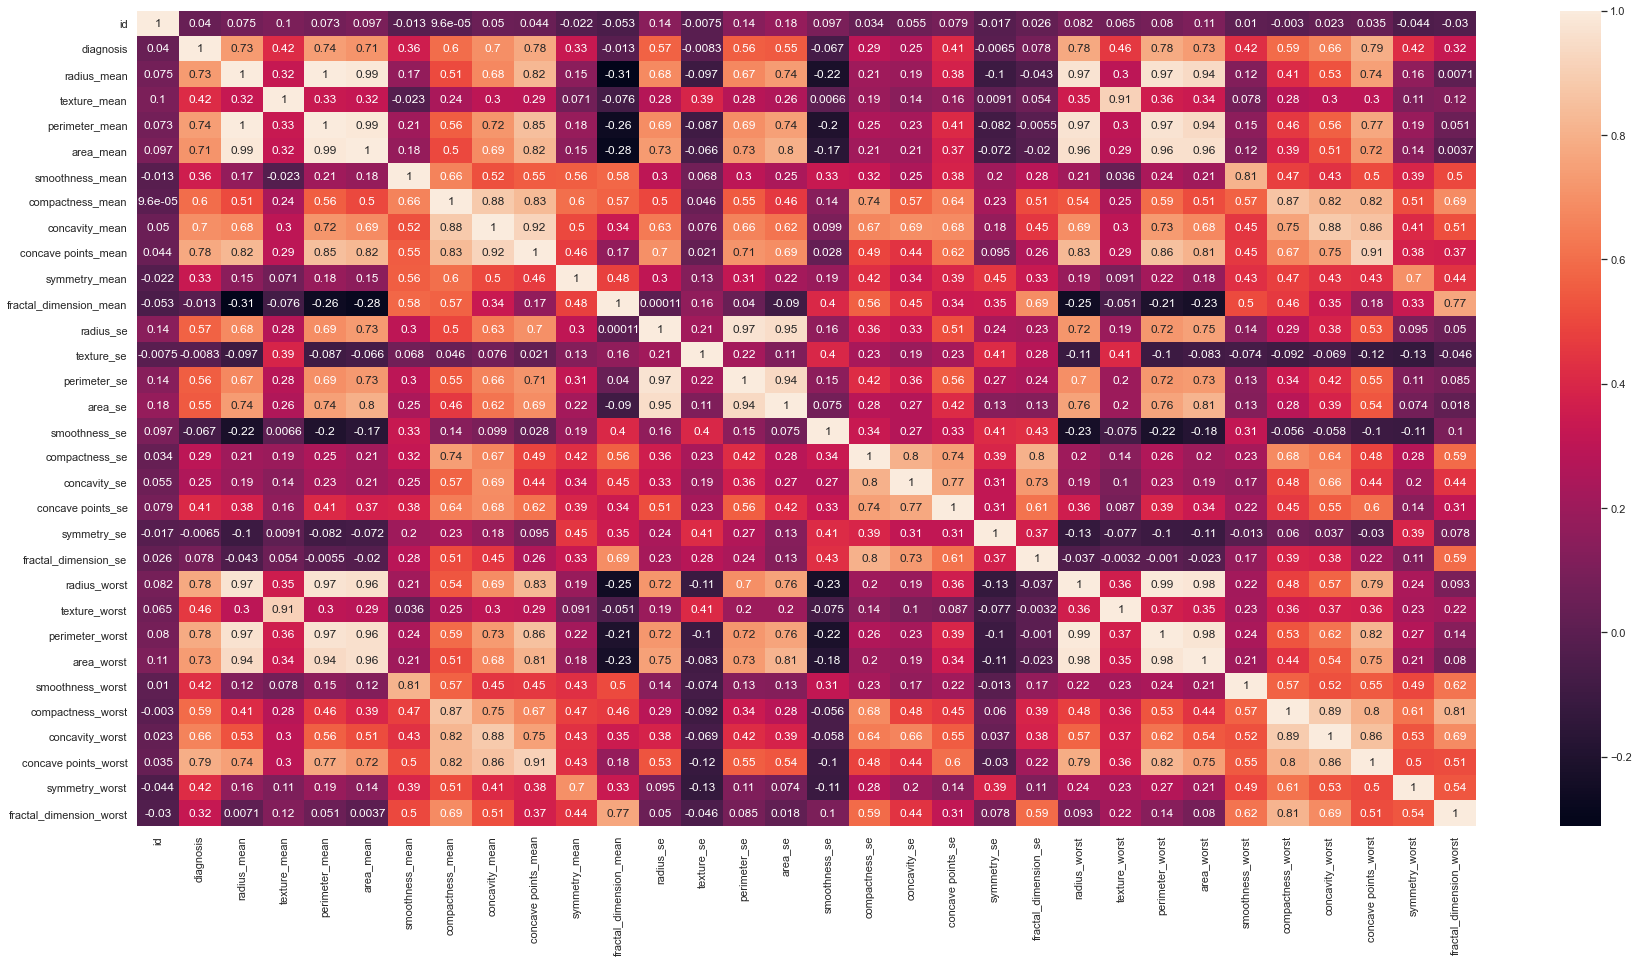

In [13]:
plt.figure(figsize = (30, 15))
sns.heatmap(df.corr(),annot=True)

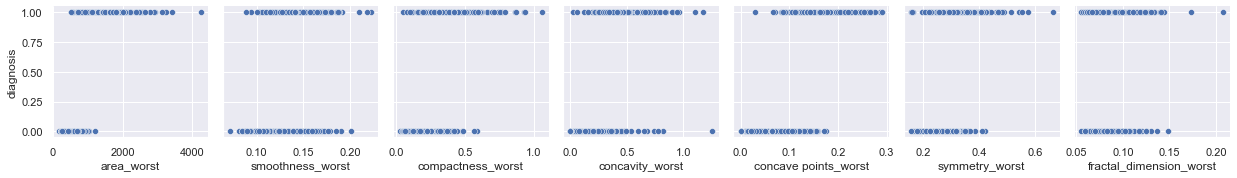

In [14]:
sns.pairplot(df,
             x_vars=[
                          'area_worst',
                     'smoothness_worst',
                  'compactness_worst',
                     'concavity_worst',
                     'concave points_worst',
                        'symmetry_worst',
                      'fractal_dimension_worst'],
             y_vars=["diagnosis"])

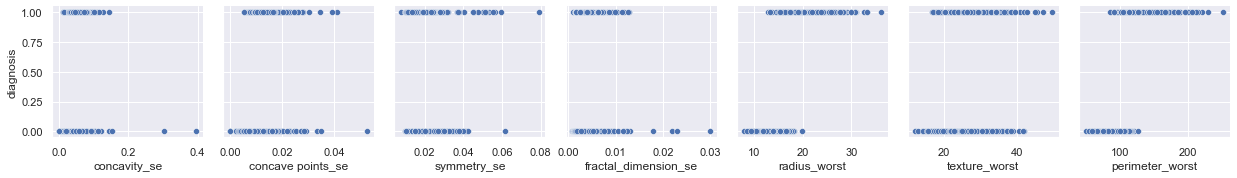

In [15]:
sns.pairplot(df,
             x_vars=[  'concavity_se', 
                     'concave points_se',
                     'symmetry_se',
                     'fractal_dimension_se',
                     'radius_worst', 
                     'texture_worst',
                  'perimeter_worst'],
             y_vars=["diagnosis"])

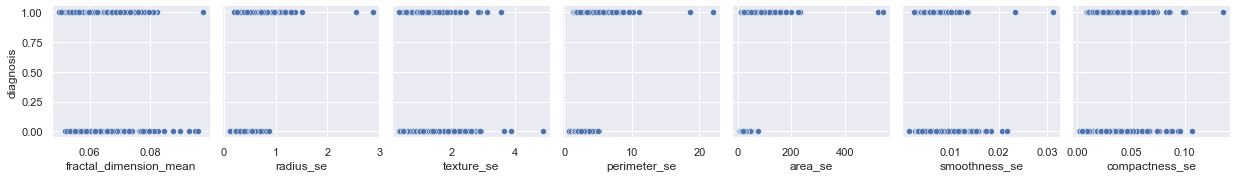

In [16]:
sns.pairplot(df,
             x_vars=[
                     'fractal_dimension_mean',
                       'radius_se', 
                     'texture_se', 
                     'perimeter_se',
                     'area_se',
                     'smoothness_se',
                    'compactness_se'],
                y_vars=["diagnosis"])

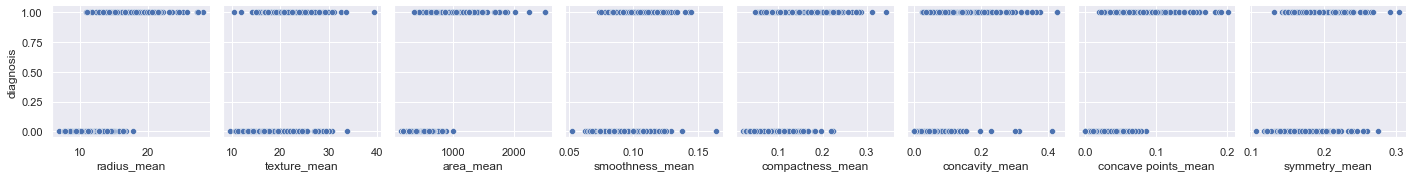

In [17]:
sns.pairplot(df,
             x_vars=['radius_mean', 
                           'texture_mean', 
                              'area_mean', 
                     'smoothness_mean',
                     'compactness_mean', 
                     'concavity_mean',
                  'concave points_mean',
                     'symmetry_mean'],
                      y_vars=["diagnosis"])

### Above graph doesn't tell much about the diagnosis

In [18]:
c={"Agg_of_all":(df["radius_mean"]+df["texture_mean"]+df["perimeter_mean"]+df["area_mean"]+df["smoothness_mean"]+df["compactness_mean"]+
                df["concavity_mean"]+df["concave points_mean"]+df["symmetry_mean"]+df["fractal_dimension_mean"]+df["radius_se"]+df["texture_se"]+
                df["perimeter_se"]+df["area_se"]+df["smoothness_se"]+df["compactness_se"]+df["concavity_se"]+df["concave points_se"]+
                df["fractal_dimension_se"]+df["symmetry_se"]+df["radius_worst"]+df["texture_worst"]+df["perimeter_worst"]+df["area_worst"]+
                df["smoothness_worst"]+df["compactness_worst"]+df["concavity_worst"]+df["concave points_worst"]+df["symmetry_worst"]+df["fractal_dimension_worst"]),"diagnosis":df["diagnosis"]}
data_1 = pd.DataFrame(data=c)

In [19]:
data_1.head()

,Agg_of_all,diagnosis
0,3566.178472,1
1,3740.923467,1
2,3387.392551,1
3,1240.001848,1
4,3336.684215,1


<AxesSubplot:xlabel='Agg_of_all', ylabel='diagnosis'>

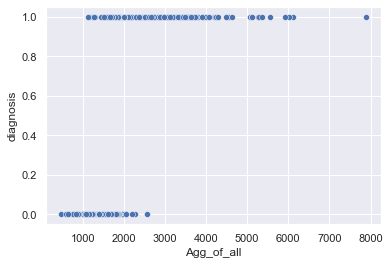

In [20]:
sns.scatterplot(data = data_1, x="Agg_of_all",y="diagnosis",legend='auto')

### So the agg_of_all above 0.2 are generally Cancer with Malignancy¶

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
def claculate_vif(dataset):
    vif=pd.DataFrame()
    vif_features = dataset.columns
    vif["vif_values"] = [variance_inflation_factor(dataset.values,i) for i in range (dataset.shape[1])]
    return vif

In [23]:
features = df[['radius_mean', 'texture_mean', 
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
claculate_vif(features)

,vif_values
0,7556.009843
1,250.766688
2,1281.013160
3,387.169455
4,115.036662
5,147.434285
6,154.239026
7,184.296547
8,606.487835
9,229.343950


### Define X and Y for Implement Models

In [24]:
X=df[['radius_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y=df["diagnosis"]

In [25]:
X[0:5]

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

## Spliting for Train & Test Dataset

In [27]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=500)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (398, 29) (398,)
Test set: (171, 29) (171,)


### scaling data

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_lr = logreg.predict(X_test)
acc_log = round(logreg.score(X_test,y_test) * 100, 2)
print("Logistic Regression Accuracy: ", acc_log)

Logistic Regression Accuracy:  99.42


In [30]:
cvs_lr = round((cross_val_score(logreg, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_lr)

c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Cross Validated Score: 95.43


c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [31]:
class_report = classification_report(y_test, Y_pred_lr)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       0.98      1.00      0.99        56

    accuracy                           0.99       171
   macro avg       0.99      1.00      0.99       171
weighted avg       0.99      0.99      0.99       171



Text(0.5, 1.05, 'Confusion Matrix (Logistic Regression)')

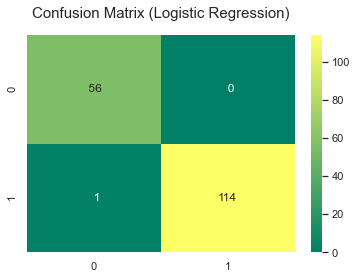

In [32]:
cnf_matrix = confusion_matrix(y_test, Y_pred_lr, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Logistic Regression)', y=1.05, size=15)

In [33]:
jac_score_logreg = round(jaccard_score(y_test, Y_pred_lr, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_logreg)

Jaccard Score:  99.13


Attribute: 0, Score: 0.33072
Attribute: 1, Score: 0.31218
Attribute: 2, Score: 0.39380
Attribute: 3, Score: 0.10796
Attribute: 4, Score: -0.37277
Attribute: 5, Score: 0.93911
Attribute: 6, Score: 1.10676
Attribute: 7, Score: -0.31383
Attribute: 8, Score: -0.25870
Attribute: 9, Score: 1.34461
Attribute: 10, Score: -0.17131
Attribute: 11, Score: 0.34422
Attribute: 12, Score: 1.01111
Attribute: 13, Score: 0.28015
Attribute: 14, Score: -0.79249
Attribute: 15, Score: -0.19444
Attribute: 16, Score: 0.31823
Attribute: 17, Score: -0.26355
Attribute: 18, Score: -0.57810
Attribute: 19, Score: 0.92718
Attribute: 20, Score: 1.52378
Attribute: 21, Score: 0.58081
Attribute: 22, Score: 0.86296
Attribute: 23, Score: 0.51424
Attribute: 24, Score: 0.07480
Attribute: 25, Score: 0.81251
Attribute: 26, Score: 0.72064
Attribute: 27, Score: 0.79972
Attribute: 28, Score: 0.46728


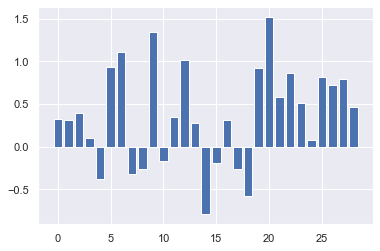

Standard Daviation of Feature Importance 0.57


In [34]:
importance_lr = logreg.coef_[0]
for i,v in enumerate(importance_lr):
    print('Attribute: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_lr))], importance_lr)
plt.show()
std_lr = round(np.std(importance_lr), 2)
print("Standard Daviation of Feature Importance", std_lr)

## Support Vector Machines

In [35]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_svm = svc.predict(X_test)
acc_svc = round(svc.score(X_test,y_test) * 100, 2)
print("Support Vector Machines Accuracy: ", acc_svc)

Support Vector Machines Accuracy:  98.25


In [36]:
cvs_svm = round((cross_val_score(svc, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_svm)

Cross Validated Score: 91.39


In [37]:
class_report = classification_report(y_test, Y_pred_svm)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       115
           1       0.95      1.00      0.97        56

    accuracy                           0.98       171
   macro avg       0.97      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 1.05, 'Confusion Matrix (Support Vector Machines)')

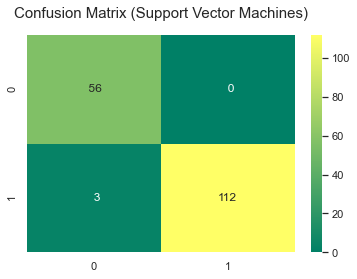

In [38]:
cnf_matrix = confusion_matrix(y_test, Y_pred_svm, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Support Vector Machines)', y=1.05, size=15)

In [39]:
jac_score_svm = round(jaccard_score(y_test, Y_pred_svm, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_svm)

Jaccard Score:  97.39


### K - Nearest Neighbours

In [40]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
print("K - Nearest Neighbours Accuracy: ", acc_knn)

K - Nearest Neighbours Accuracy:  97.66


In [41]:
cvs_knn = round((cross_val_score(knn, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_knn)

Cross Validated Score: 93.15


In [42]:
class_report = classification_report(y_test, Y_pred_knn)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       115
           1       0.98      0.95      0.96        56

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 1.05, 'Confusion Matrix (K - Nearest Neighbours)')

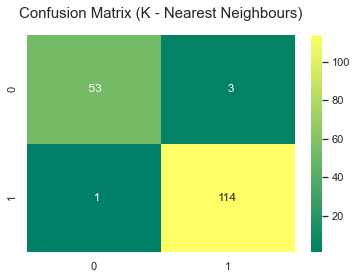

In [43]:
cnf_matrix = confusion_matrix(y_test, Y_pred_knn, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (K - Nearest Neighbours)', y=1.05, size=15)

In [44]:
jac_score_knn = round(jaccard_score(y_test, Y_pred_knn, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_knn)

Jaccard Score:  96.61


## Gaussian Naive Bayes

In [45]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred_gnb = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test,y_test) * 100, 2)
print("Gaussian Naive Bayes Accuracy: ", acc_gaussian)

Gaussian Naive Bayes Accuracy:  93.57


In [46]:
cvs_gnb = round((cross_val_score(gaussian, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_gnb)

Cross Validated Score: 93.5


In [47]:
class_report = classification_report(y_test, Y_pred_gnb)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       115
           1       0.88      0.93      0.90        56

    accuracy                           0.94       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



Text(0.5, 1.05, 'Confusion Matrix (Gaussian Naive Bayes)')

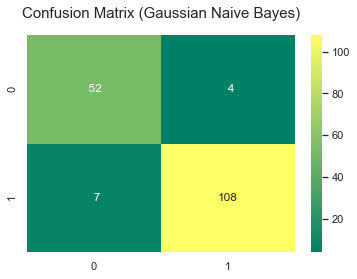

In [48]:
cnf_matrix = confusion_matrix(y_test, Y_pred_gnb, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Gaussian Naive Bayes)', y=1.05, size=15)

In [49]:
jac_score_gaussian = round(jaccard_score(y_test, Y_pred_gnb, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_gaussian)

Jaccard Score:  90.76


## Perceptron

In [50]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred_p = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test,y_test) * 100, 2)
print("Perceptron Accuracy: ", acc_perceptron)

Perceptron Accuracy:  98.25


In [51]:
cvs_p = round((cross_val_score(perceptron, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_p)

Cross Validated Score: 90.51


In [52]:
class_report = classification_report(y_test, Y_pred_p)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       115
           1       0.95      1.00      0.97        56

    accuracy                           0.98       171
   macro avg       0.97      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 1.05, 'Confusion Matrix (Perceptron)')

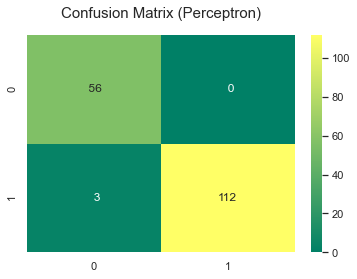

In [53]:
cnf_matrix = confusion_matrix(y_test, Y_pred_p, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Perceptron)', y=1.05, size=15)

In [54]:
jac_score_perceptron = round(jaccard_score(y_test, Y_pred_p, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_perceptron)

Jaccard Score:  97.39


## Linear Support Vector Classification

In [55]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred_lsvc = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test,y_test) * 100, 2)
print("Linear Support Vector Classification Accuracy: ", acc_linear_svc)

Linear Support Vector Classification Accuracy:  98.25


In [56]:
cvs_lsvc = round((cross_val_score(linear_svc, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_lsvc)

c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\akash\appdata\local\program

Cross Validated Score: 84.38


c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [57]:
class_report = classification_report(y_test, Y_pred_lsvc)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       115
           1       0.95      1.00      0.97        56

    accuracy                           0.98       171
   macro avg       0.97      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 1.05, 'Confusion Matrix (Linear Support Vector Classification)')

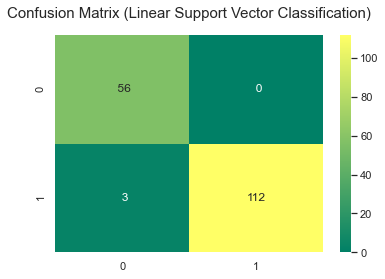

In [58]:
cnf_matrix = confusion_matrix(y_test, Y_pred_lsvc, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Linear Support Vector Classification)', y=1.05, size=15)

In [59]:
jac_score_linear_svc = round(jaccard_score(y_test, Y_pred_lsvc, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_linear_svc)

Jaccard Score:  97.39


## Stochastic Gradient Descent

In [60]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test,y_test) * 100, 2)
print("Stochastic Gradient Descent Accuracy: ", acc_sgd)

Stochastic Gradient Descent Accuracy:  96.49


In [61]:
cvs_sgd = round((cross_val_score(sgd, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_sgd)

Cross Validated Score: 88.93


In [62]:
class_report = classification_report(y_test, Y_pred_sgd)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       115
           1       0.90      1.00      0.95        56

    accuracy                           0.96       171
   macro avg       0.95      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



Text(0.5, 1.05, 'Confusion Matrix (Stochastic Gradient Descent)')

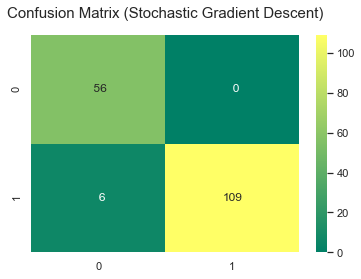

In [63]:
cnf_matrix = confusion_matrix(y_test, Y_pred_sgd, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Stochastic Gradient Descent)', y=1.05, size=15)

In [64]:
jac_score_sgd = round(jaccard_score(y_test, Y_pred_sgd, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_sgd)

Jaccard Score:  94.78


## Decision Tree

In [65]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dt = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test,y_test) * 100, 2)
print("Decision Tree Accuracy: ", acc_decision_tree)

Decision Tree Accuracy:  93.57


In [66]:
cvs_dt = round((cross_val_score(decision_tree, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_dt)

Cross Validated Score: 91.74


In [67]:
class_report = classification_report(y_test, Y_pred_dt)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       115
           1       0.86      0.96      0.91        56

    accuracy                           0.94       171
   macro avg       0.92      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



Text(0.5, 1.05, 'Confusion Matrix (Decision Tree)')

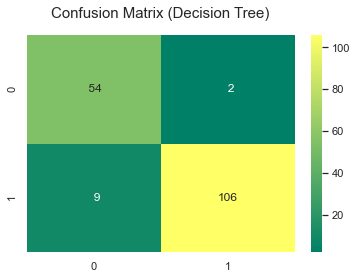

In [68]:
cnf_matrix = confusion_matrix(y_test, Y_pred_dt, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Decision Tree)', y=1.05, size=15)

In [69]:
jac_score_dt = round(jaccard_score(y_test, Y_pred_dt, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_dt)

Jaccard Score:  90.6


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.68446
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.01687
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.02719
Feature: 13, Score: 0.00206
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.02636
Feature: 20, Score: 0.06709
Feature: 21, Score: 0.07664
Feature: 22, Score: 0.07147
Feature: 23, Score: 0.01022
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00922
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00843
Feature: 28, Score: 0.00000


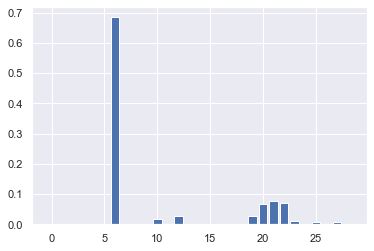

Standard Daviation of Feature Importance 0.12


In [70]:
importance_dt = decision_tree.feature_importances_

for i,v in enumerate(importance_dt):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_dt))], importance_dt)
plt.show()
std_dt = round(np.std(importance_dt), 2)
print("Standard Daviation of Feature Importance", std_dt)

## Random Forest

In [71]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test,y_test) * 100, 2)
print("Random Forest Accuracy: ", acc_random_forest)

Random Forest Accuracy:  96.49


In [72]:
cvs_rf = round((cross_val_score(random_forest, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_rf)

Cross Validated Score: 95.96


In [73]:
class_report = classification_report(y_test, Y_pred_rf)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       115
           1       0.92      0.98      0.95        56

    accuracy                           0.96       171
   macro avg       0.95      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



Text(0.5, 1.05, 'Confusion Matrix (Random Forest)')

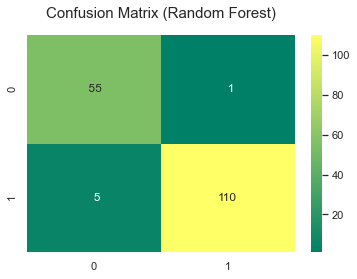

In [74]:
cnf_matrix = confusion_matrix(y_test, Y_pred_rf, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Random Forest)', y=1.05, size=15)

In [75]:
jac_score_rf = round(jaccard_score(y_test, Y_pred_rf, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_rf)

Jaccard Score:  94.83


Feature: 0, Score: 0.05025
Feature: 1, Score: 0.04746
Feature: 2, Score: 0.05303
Feature: 3, Score: 0.00805
Feature: 4, Score: 0.01353
Feature: 5, Score: 0.05682
Feature: 6, Score: 0.11092
Feature: 7, Score: 0.00344
Feature: 8, Score: 0.00453
Feature: 9, Score: 0.00691
Feature: 10, Score: 0.00427
Feature: 11, Score: 0.01362
Feature: 12, Score: 0.02595
Feature: 13, Score: 0.00712
Feature: 14, Score: 0.00556
Feature: 15, Score: 0.00484
Feature: 16, Score: 0.00451
Feature: 17, Score: 0.00573
Feature: 18, Score: 0.00358
Feature: 19, Score: 0.12299
Feature: 20, Score: 0.01703
Feature: 21, Score: 0.10976
Feature: 22, Score: 0.11531
Feature: 23, Score: 0.01547
Feature: 24, Score: 0.01320
Feature: 25, Score: 0.03282
Feature: 26, Score: 0.12700
Feature: 27, Score: 0.00930
Feature: 28, Score: 0.00703


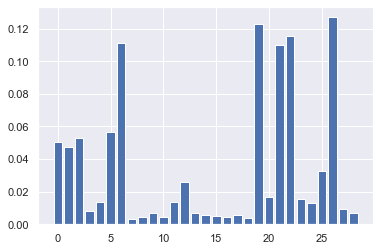

Standard Daviation of Feature Importance 0.04


In [76]:
importance_rf = random_forest.feature_importances_

for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_rf))], importance_rf)
plt.show()
std_rf = round(np.std(importance_rf), 2)
print("Standard Daviation of Feature Importance", std_rf)

## AdaBoost

In [77]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1)
abc.fit(X_train, y_train)
Y_pred_abc = abc.predict(X_test)
abc_score = round(abc.score(X_test,y_test) * 100, 2)
print("AdaBoost Accuracy: ", abc_score)

AdaBoost Accuracy:  96.49


In [78]:
cvs_abc = round((cross_val_score(abc, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_abc)

Cross Validated Score: 96.48


In [79]:
class_report = classification_report(y_test, Y_pred_abc)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       115
           1       0.92      0.98      0.95        56

    accuracy                           0.96       171
   macro avg       0.95      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



Text(0.5, 1.05, 'Confusion Matrix (AdaBoost)')

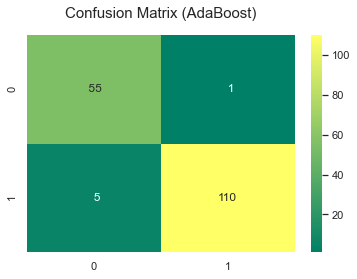

In [80]:
cnf_matrix = confusion_matrix(y_test, Y_pred_abc, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (AdaBoost)', y=1.05, size=15)

In [81]:
jac_score_abc = round(jaccard_score(y_test, Y_pred_abc, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_abc)

Jaccard Score:  94.83


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.01000
Feature: 3, Score: 0.01000
Feature: 4, Score: 0.08000
Feature: 5, Score: 0.07000
Feature: 6, Score: 0.06000
Feature: 7, Score: 0.02000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.02000
Feature: 10, Score: 0.01000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.06000
Feature: 13, Score: 0.04000
Feature: 14, Score: 0.07000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.05000
Feature: 17, Score: 0.01000
Feature: 18, Score: 0.07000
Feature: 19, Score: 0.04000
Feature: 20, Score: 0.10000
Feature: 21, Score: 0.03000
Feature: 22, Score: 0.04000
Feature: 23, Score: 0.07000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.04000
Feature: 26, Score: 0.06000
Feature: 27, Score: 0.02000
Feature: 28, Score: 0.02000


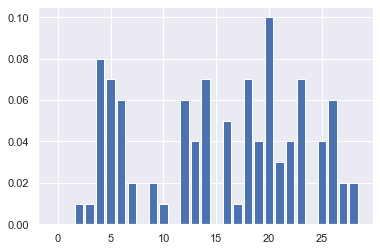

Standard Daviation of Feature Importance 0.03


In [82]:
importance_abc = abc.feature_importances_

for i,v in enumerate(importance_abc):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_abc))], importance_abc)
plt.show()
std_abc = round(np.std(importance_abc), 2)
print("Standard Daviation of Feature Importance", std_abc)

## XGBoost

In [83]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
Y_pred_xgb = xgb.predict(X_test)
XGB_score = round(xgb.score(X_test,y_test) * 100, 2)
print("XGBoost Accuracy: ", XGB_score)

[22:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy:  97.66


c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [84]:
cvs_xgb = round((cross_val_score(xgb, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_xgb)

[22:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\akash\appdata\local\progr

[22:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\akash\appdata\local\progr

[22:21:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\akash\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross Validated Score: 97.19


In [85]:
class_report = classification_report(y_test, Y_pred_xgb)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       115
           1       0.95      0.98      0.96        56

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 1.05, 'Confusion Matrix (XGBoost)')

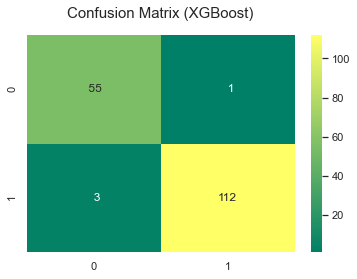

In [86]:
cnf_matrix = confusion_matrix(y_test, Y_pred_xgb, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (XGBoost)', y=1.05, size=15)

In [87]:
jac_score_xgb = round(jaccard_score(y_test, Y_pred_xgb, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_xgb)

Jaccard Score:  96.55


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.05259
Feature: 2, Score: 0.04692
Feature: 3, Score: 0.00823
Feature: 4, Score: 0.00180
Feature: 5, Score: 0.00944
Feature: 6, Score: 0.31131
Feature: 7, Score: 0.00135
Feature: 8, Score: 0.00439
Feature: 9, Score: 0.01868
Feature: 10, Score: 0.01532
Feature: 11, Score: 0.01982
Feature: 12, Score: 0.00593
Feature: 13, Score: 0.00492
Feature: 14, Score: 0.00327
Feature: 15, Score: 0.01777
Feature: 16, Score: 0.00466
Feature: 17, Score: 0.00242
Feature: 18, Score: 0.00676
Feature: 19, Score: 0.09210
Feature: 20, Score: 0.02458
Feature: 21, Score: 0.10694
Feature: 22, Score: 0.05197
Feature: 23, Score: 0.00796
Feature: 24, Score: 0.00482
Feature: 25, Score: 0.01666
Feature: 26, Score: 0.14112
Feature: 27, Score: 0.00175
Feature: 28, Score: 0.01649


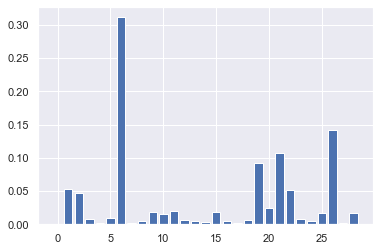

Standard Daviation of Feature Importance 0.06


In [88]:
importance_xgb = xgb.feature_importances_

for i,v in enumerate(importance_xgb):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_xgb))], importance_xgb)
plt.show()
std_xgb = round(np.std(importance_xgb), 2)
print("Standard Daviation of Feature Importance", std_xgb)

## ROC Curve

In [89]:
auc_lr = roc_auc_score(y_test, Y_pred_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, Y_pred_lr)

auc_svm = roc_auc_score(y_test, Y_pred_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, Y_pred_svm)

auc_knn = roc_auc_score(y_test, Y_pred_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, Y_pred_knn)

auc_gnb = roc_auc_score(y_test, Y_pred_gnb)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, Y_pred_gnb)

auc_p = roc_auc_score(y_test, Y_pred_p)
fpr_p, tpr_p, thresholds_p = roc_curve(y_test, Y_pred_p)

auc_lsvc = roc_auc_score(y_test, Y_pred_lsvc)
fpr_lsvc, tpr_lsvc, thresholds_lsvc = roc_curve(y_test, Y_pred_lsvc)

auc_sgd = roc_auc_score(y_test, Y_pred_sgd)
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, Y_pred_sgd)

auc_dt = roc_auc_score(y_test, Y_pred_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, Y_pred_dt)

auc_rf = roc_auc_score(y_test, Y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, Y_pred_rf)

auc_abc = roc_auc_score(y_test, Y_pred_abc)
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, Y_pred_abc)

auc_xgb = roc_auc_score(y_test, Y_pred_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, Y_pred_xgb)

### Plotting

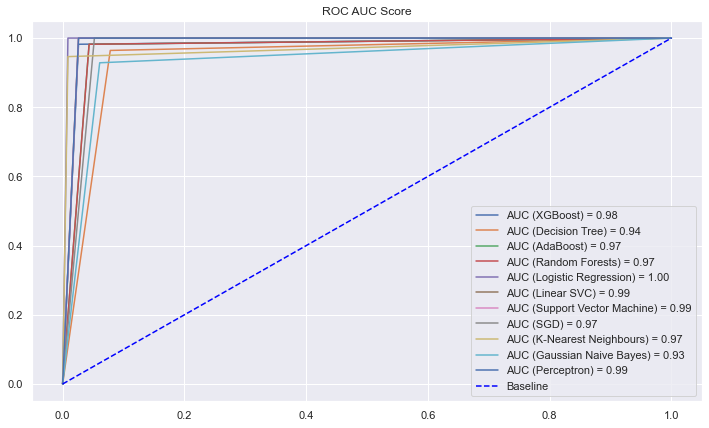

In [90]:
plt.figure(figsize=(12, 7))
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC (XGBoost) = {auc_xgb:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_abc, tpr_abc, label=f'AUC (AdaBoost) = {auc_abc:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_lsvc, tpr_lsvc, label=f'AUC (Linear SVC) = {auc_lsvc:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'AUC (Support Vector Machine) = {auc_svm:.2f}')
plt.plot(fpr_sgd, tpr_sgd, label=f'AUC (SGD) = {auc_sgd:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (K-Nearest Neighbours) = {auc_knn:.2f}')
plt.plot(fpr_gnb, tpr_gnb, label=f'AUC (Gaussian Naive Bayes) = {auc_gnb:.2f}')
plt.plot(fpr_p, tpr_p, label=f'AUC (Perceptron) = {auc_p:.2f}')

plt.title('ROC AUC Score')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.legend()

## Mean Squared Error and Mean Absolute Error

In [91]:
lr_mae = round((mean_absolute_error(y_test, Y_pred_lr)*100), 2)
lr_mse = round((mean_squared_error(y_test, Y_pred_lr)*100), 2)

svm_mae = round((mean_absolute_error(y_test, Y_pred_svm)*100), 2)
svm_mse = round((mean_squared_error(y_test, Y_pred_svm)*100), 2)

knn_mae = round((mean_absolute_error(y_test, Y_pred_knn)*100), 2)
knn_mse = round((mean_squared_error(y_test, Y_pred_knn)*100), 2)

gnb_mae = round((mean_absolute_error(y_test, Y_pred_gnb)*100), 2)
gnb_mse = round((mean_squared_error(y_test, Y_pred_gnb)*100), 2)

p_mae = round((mean_absolute_error(y_test, Y_pred_p)*100), 2)
p_mse = round((mean_squared_error(y_test, Y_pred_p)*100), 2)

lsvc_mae = round((mean_absolute_error(y_test, Y_pred_lsvc)*100), 2)
lsvc_mse = round((mean_squared_error(y_test, Y_pred_lsvc)*100), 2)

sgd_mae = round((mean_absolute_error(y_test, Y_pred_sgd)*100), 2)
sgd_mse = round((mean_squared_error(y_test, Y_pred_sgd)*100), 2)

dt_mae = round((mean_absolute_error(y_test, Y_pred_dt)*100), 2)
dt_mse = round((mean_squared_error(y_test, Y_pred_dt)*100), 2)

rf_mae = round((mean_absolute_error(y_test, Y_pred_rf)*100), 2)
rf_mse = round((mean_squared_error(y_test, Y_pred_rf)*100), 2)

abc_mae = round((mean_absolute_error(y_test, Y_pred_abc)*100), 2)
abc_mse = round((mean_squared_error(y_test, Y_pred_abc)*100), 2)

xgb_mae = round((mean_absolute_error(y_test, Y_pred_xgb)*100), 2)
xgb_mse = round((mean_squared_error(y_test, Y_pred_xgb)*100), 2)

## Final Table
#### Excluding Feature Importance

In [92]:
models = pd.DataFrame({
    'Algorithm Name': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree','AdaBoost Classifier','XGBoost Classifier'],
    'Accuracy Score (%)': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree, abc_score,XGB_score],
    'Jaccard Score (%)' : [jac_score_svm, jac_score_knn, jac_score_logreg, jac_score_rf, jac_score_gaussian, jac_score_perceptron, jac_score_sgd, jac_score_linear_svc, jac_score_dt, jac_score_abc, jac_score_xgb],
    'Cross Validated Score (%)' : [cvs_svm, cvs_knn, cvs_lr, cvs_rf, cvs_gnb, cvs_p, cvs_sgd, cvs_lsvc, cvs_dt, cvs_abc, cvs_xgb],
    'AUC Score (%)' : [(round(auc_svm*100, 2)), (round(auc_knn*100, 2)), (round(auc_lr*100, 2)), (round(auc_rf*100, 2)), (round(auc_gnb*100, 2)), (round(auc_p*100, 2)), (round(auc_sgd*100, 2)), (round(auc_lsvc*100, 2)), (round(auc_dt*100, 2)), (round(auc_abc*100, 2)), (round(auc_xgb*100, 2))],
    'Misclassification (%)': [(abs(acc_svc-100)), (abs(acc_knn-100)), (abs(acc_log-100)), (abs(acc_random_forest-100)), (abs(acc_gaussian-100)), (abs(acc_perceptron-100)), (abs(acc_sgd-100)), (abs(acc_linear_svc-100)), (abs(acc_decision_tree-100)), (abs(abc_score-100)), (abs(XGB_score-100))],
    'Mean Absolute Error (%)' : [svm_mae, knn_mae, lr_mae, rf_mae, gnb_mae, p_mae, sgd_mae, lsvc_mae, dt_mae, abc_mae, xgb_mae],
    'Mean Squared Error (%)' : [svm_mse, knn_mse, lr_mse, rf_mse, gnb_mse, p_mse, sgd_mse, lsvc_mse, dt_mse, abc_mse, xgb_mse],
    'Standard Deviation' : ['--', '--', std_lr, std_rf, '--', '--', '--', '--', std_dt, std_abc, std_xgb]
})
models.to_csv (r'export_dataframe.csv', index = False, header=True)
models.sort_values(by = 'Accuracy Score (%)', ascending = False)

,Algorithm Name,Accuracy Score (%),Jaccard Score (%),Cross Validated Score (%),AUC Score (%),Misclassification (%),Mean Absolute Error (%),Mean Squared Error (%),Standard Deviation
2,Logistic Regression,99.42,99.13,95.43,99.57,0.58,0.58,0.58,0.57
0,Support Vector Machines,98.25,97.39,91.39,98.70,1.75,1.75,1.75,--
5,Perceptron,98.25,97.39,90.51,98.70,1.75,1.75,1.75,--
7,Linear SVC,98.25,97.39,84.38,98.70,1.75,1.75,1.75,--
1,KNN,97.66,96.61,93.15,96.89,2.34,2.34,2.34,--
10,XGBoost Classifier,97.66,96.55,97.19,97.80,2.34,2.34,2.34,0.06
3,Random Forest,96.49,94.83,95.96,96.93,3.51,3.51,3.51,0.04
6,Stochastic Gradient Decent,96.49,94.78,88.93,97.39,3.51,3.51,3.51,--
9,AdaBoost Classifier,96.49,94.83,96.48,96.93,3.51,3.51,3.51,0.03
4,Naive Bayes,93.57,90.76,93.50,93.39,6.43,6.43,6.43,--


## Visualizations

In [93]:
Tfont = {'fontname':'Cambria', 'fontsize':20}
Lfont = {'fontname':'Cambria', 'fontsize':16}

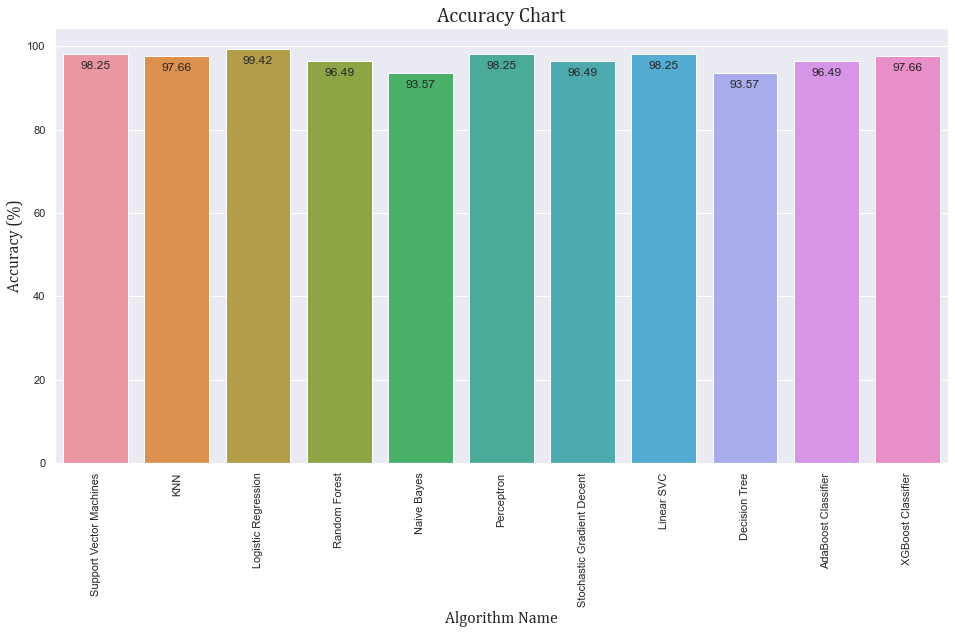

In [94]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="Accuracy Score (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("Accuracy Chart",**Tfont)
plt.ylabel("Accuracy (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)

plt.show()

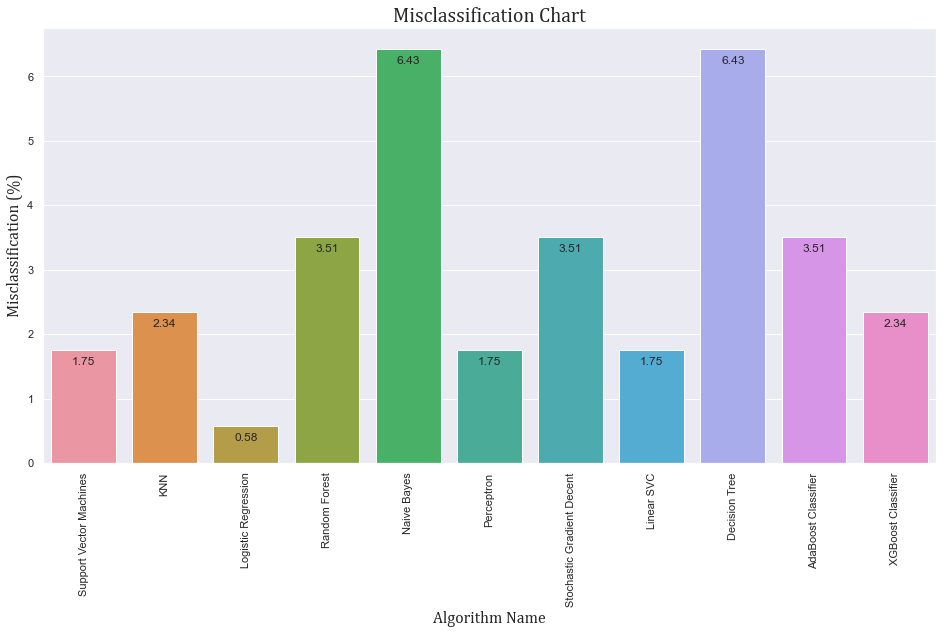

In [95]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="Misclassification (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("Misclassification Chart",**Tfont)
plt.ylabel("Misclassification (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)

plt.show()

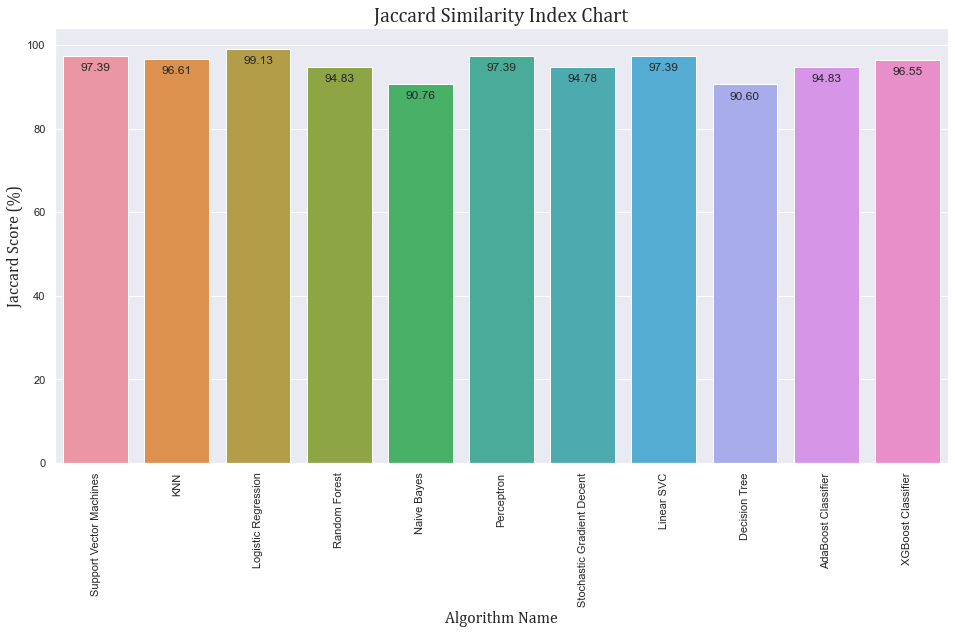

In [96]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="Jaccard Score (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("Jaccard Similarity Index Chart",**Tfont)
plt.ylabel("Jaccard Score (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)

plt.show()

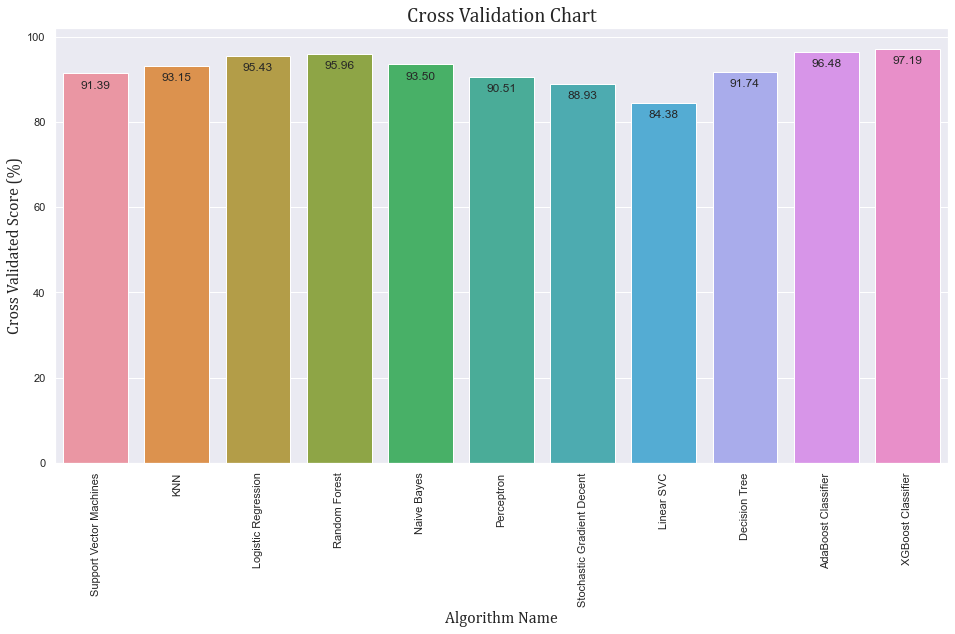

In [97]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="Cross Validated Score (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("Cross Validation Chart",**Tfont)
plt.ylabel("Cross Validated Score (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)

plt.show()

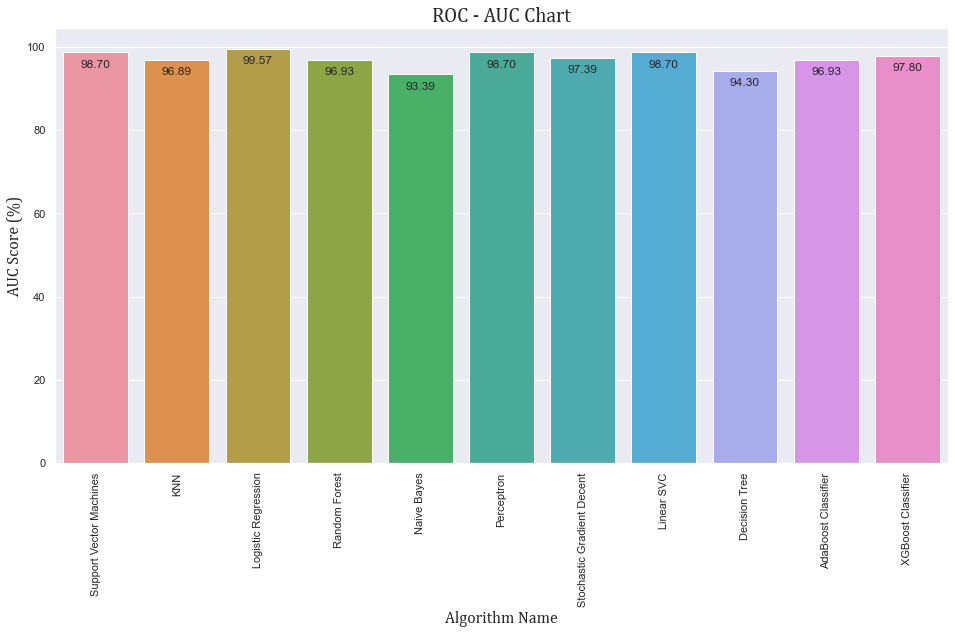

In [98]:
plt.figure(figsize=(16, 8))
splot=sns.barplot(y="AUC Score (%)",x="Algorithm Name",data=models)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=90)

plt.title("ROC - AUC Chart",**Tfont)
plt.ylabel("AUC Score (%)",**Lfont)
plt.xlabel("Algorithm Name",**Lfont)

plt.show()

<center><h1>The End</h1></center>
